<h1 style="color: #492c68;">01 | LOOKING FOR A MODEL</h1>

<h2 style="color: #327a81;">Libraries</h2>

In [1]:
## Basic libraries
import pandas as pd # data manipulation
import numpy as np # funciones matemáticas

## EDA Libraries 
import matplotlib.pyplot as plt
import seaborn as sns

## Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

In [2]:
## ML models

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [3]:
# scikit-learn

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, roc_curve, ConfusionMatrixDisplay, roc_auc_score
from sklearn import metrics
import pickle

In [4]:
# Text Tokenization

from sklearn.feature_extraction.text import CountVectorizer

In [5]:
# Saving models with pickle

import pickle

<h2 style="color: #327a81;">Data Extraction</h2>

In [6]:
data = pd.read_csv("to_modeling.csv", index_col=0)

In [7]:
data.head(5)

,text,state,type_news,tags,n_of_tags,text_ml,numerical_sentiment,sentiment
0,Por si sabéis de alguien: Van a sacrificar 6 c...,0,Fake,"['sabéis', 'alguien', 'sacrificar', 'cachorrit...",17,sabéis alguien sacrificar cachorritos dalmata ...,0.019873,Very Negative
1,#CruzRoja se niega en #Algeciras a ayudar a un...,0,Fake,"['cruzroja', 'niega', 'algeciras', 'ayudar', '...",16,cruzroja niega algeciras ayudar ciudadano espa...,0.176052,Very Negative
2,Si alguien sigue la actualidad municipal y la...,1,Real,"['alguien', 'sigue', 'actualidad', 'municipal'...",21,alguien sigue actualidad municipal promesas el...,0.009806,Very Negative
3,"La francesa Stéphanie Frappart , que entrará e...",1,Real,"['francesa', 'stéphanie', 'frappart', 'entrará...",17,francesa stéphanie frappart entrará historia s...,0.069200,Very Negative
4,"A esto tranquilo que no te responderán, o sí: ...",0,Fake,"['tranquilo', 'responderán', 'fascista', 'vien...",16,tranquilo responderán fascista vienen pagarnos...,0.391362,Negative


In [8]:
df = data.copy()

<h2 style="color: #327a81;">Modeling</h2>

<h3 style="color: #60b671;">X-y Split</h3>

In [9]:
X = df["text_ml"]
y = df["state"]

<h3 style="color: #60b671;">Train-Test Split</h3>

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [11]:
print(f'100% of our data: {len(df)}.')
print(f'75% for training data: {len(X_train)}.')
print(f'25% for test data: {len(X_test)}.')

100% of our data: 1997.
75% for training data: 1497.
25% for test data: 500.


<h3 style="color: #60b671;">Text Tokenization</h3>

In [12]:
# Tokenization is necesary for preprocessing text to ML
# We will use CountVectorizer

vect = CountVectorizer()
X_train_dtm = vect.fit_transform(X_train) # dtm as document-term matrix
X_test_dtm = vect.transform(X_test)

<h2 style="color: #327a81;">Machine Learning Models</h2>

- Let's try some different models for chosing one with best results

<h3 style="color: #60b671;">Logistic Regression</h3>

In [13]:
model_LR = LogisticRegression()
model_LR.fit(X_train_dtm, y_train)

LogisticRegression()

In [14]:
# Model Validation

LR_predictions = model_LR.predict(X_test_dtm)

In [15]:
# Metrics for LR

print(classification_report(y_test, LR_predictions))

              precision    recall  f1-score   support

           0       0.75      0.76      0.76       258
           1       0.74      0.73      0.74       242

    accuracy                           0.75       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.75      0.75      0.75       500



<h3 style="color: #60b671;">Random Forest</h3>

In [16]:
model_RF = RandomForestClassifier()
model_RF.fit(X_train_dtm, y_train)

RandomForestClassifier()

In [17]:
# Model Validation

RF_predictions = model_RF.predict(X_test_dtm)

In [18]:
# Metrics for RF

print(classification_report(y_test, RF_predictions))

              precision    recall  f1-score   support

           0       0.77      0.73      0.75       258
           1       0.73      0.76      0.74       242

    accuracy                           0.75       500
   macro avg       0.75      0.75      0.75       500
weighted avg       0.75      0.75      0.75       500



<h3 style="color: #60b671;">XGBoost</h3>

In [19]:
model_XG = XGBClassifier()
model_XG.fit(X_train_dtm, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [20]:
# Model Validation

XG_predictions = model_XG.predict(X_test_dtm)

In [21]:
# Metrics for XG

print(classification_report(y_test, XG_predictions))

              precision    recall  f1-score   support

           0       0.69      0.74      0.71       258
           1       0.70      0.65      0.67       242

    accuracy                           0.69       500
   macro avg       0.69      0.69      0.69       500
weighted avg       0.69      0.69      0.69       500



<h3 style="color: #60b671;">Decision Trees</h3>

In [22]:
model_DT = DecisionTreeClassifier()
model_DT.fit(X_train_dtm, y_train)

DecisionTreeClassifier()

In [23]:
# Model Validation

DT_predictions = model_DT.predict(X_test_dtm)

In [24]:
# Metrics for DT

print(classification_report(y_test, DT_predictions))

              precision    recall  f1-score   support

           0       0.64      0.70      0.67       258
           1       0.65      0.58      0.61       242

    accuracy                           0.64       500
   macro avg       0.64      0.64      0.64       500
weighted avg       0.64      0.64      0.64       500



<h3 style="color: #60b671;">Naive Bayes</h3>

In [25]:
model_NB = MultinomialNB()
model_NB.fit(X_train_dtm, y_train)

MultinomialNB()

In [26]:
#Model Validation

NB_predictions = model_NB.predict(X_test_dtm)

In [27]:
# Metrics for NB

print(classification_report(y_test, NB_predictions))

              precision    recall  f1-score   support

           0       0.77      0.76      0.77       258
           1       0.75      0.76      0.75       242

    accuracy                           0.76       500
   macro avg       0.76      0.76      0.76       500
weighted avg       0.76      0.76      0.76       500



- Naive Bayes has the best accuracy of all models tested, so it will be the choosen one to finally predict whether the new texts are true or false. 

<h2 style="color: #327a81;">Selected Model: Naive Bayes</h2>

In [28]:
print("Test data accuracy: ",round(model_NB.score(X_test_dtm,y_test),4))
print("Train data accuracy: ", round(model_NB.score(X_train_dtm, y_train),4))

Test data accuracy:  0.76
Train data accuracy:  0.992


<h3 style="color: #60b671;">Confusion Matrix Naive Bayes</h3>

In [29]:
cm_nb = confusion_matrix(y_test, NB_predictions)

<Figure size 800x600 with 0 Axes>

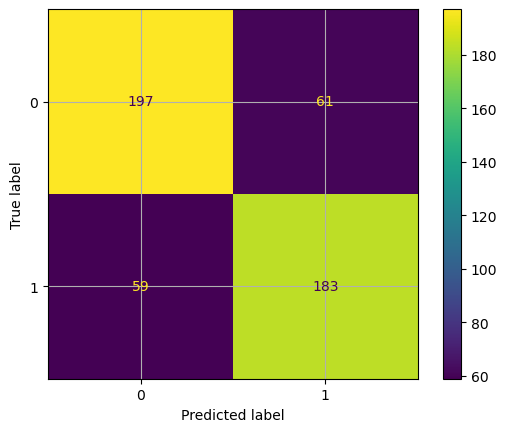

In [30]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
plt.figure(figsize=(8, 6))
disp.plot(cmap='viridis')  
plt.grid(True)
plt.show()

-  Matrix Confusion gave us good results.

<h3 style="color: #60b671;">Roc Curve Naive Bayes</h3>

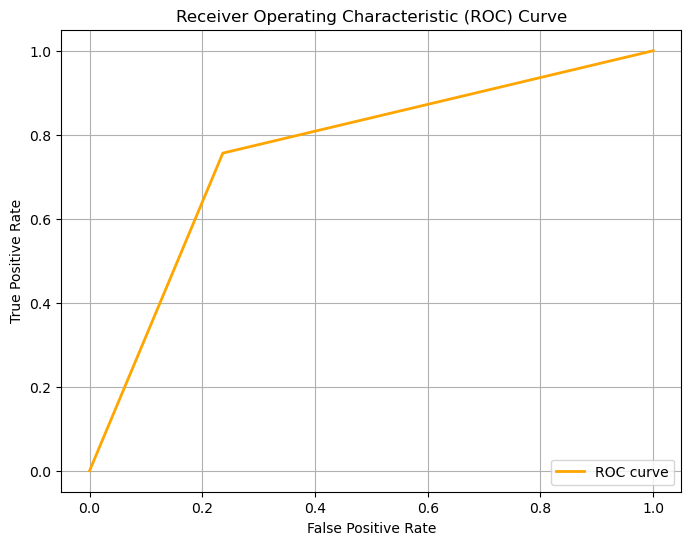

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, NB_predictions, pos_label=1)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label='ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

<h1 style="color: #492c68;">02 | EXTERNAL TESTING</h1>

<h2 style="color: #327a81;">Data Extraction</h2>

In [32]:
# We load a new independent dataset, already preprocessed, in which we know if they are true or false

df_test = pd.read_csv("to_testing.csv", index_col=0)

In [33]:
df_test.sample(10)

,class,text,test_tags,test_text
1320,False,Los bomberos catalanes están decididos a demos...,"['bomberos', 'catalanes', 'decididos', 'demost...",bomberos catalanes decididos demostrar favor i...
1293,True,Las tres activistas feministas y LGTBIQ+ denun...,"['activistas', 'feministas', 'lgtbiq', 'denunc...",activistas feministas lgtbiq denunciadas hazte...
79,True,El conflicto laboral en el seno de los Mossos...,"['conflicto', 'laboral', 'mossos', 'esquadra',...",conflicto laboral mossos esquadra vuelve tomar...
180,True,Las tres fuerzas que integrarán el próximo Go...,"['fuerzas', 'integrarán', 'próximo', 'gobierno...",fuerzas integrarán próximo gobierno valenciano...
443,True,Compruebe los posibles pactos que necesitarían...,"['compruebe', 'posibles', 'pactos', 'necesitar...",compruebe posibles pactos necesitarían diferen...
946,False,Finalmente la Guardia Civil ha confirmado que ...,"['finalmente', 'guardia', 'civil', 'confirmado...",finalmente guardia civil confirmado incendio p...
420,True,Cerca del 50% de los aparatos médicos donados ...,"['cerca', 'aparatos', 'médicos', 'donados', 's...",cerca aparatos médicos donados sexto hombre mu...
289,False,A continuación se presenta el resumen de un in...,"['continuación', 'presenta', 'resumen', 'infor...",continuación presenta resumen informe realizad...
1977,True,La exhibición de pancartas y el operativo del...,"['exhibición', 'pancartas', 'operativo', 'inte...",exhibición pancartas operativo interior estadi...
1340,False,Los manteros vuelven a ser noticia por su acti...,"['manteros', 'vuelven', 'noticia', 'actitud', ...",manteros vuelven noticia actitud violenta chul...


<h2 style="color: #327a81;">Applying Naive Bayes Prediction</h2>

In [34]:
test = df_test["test_text"]

In [35]:
test_dtm = vect.transform(test)

In [36]:
test_predictions = model_NB.predict(test_dtm)

In [37]:
test_predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [38]:
df_test["type_news"] = test_predictions

In [39]:
df_test["type_news"].replace({1 : "Real", 0 : "Fake"}, inplace=True)

In [40]:
df_test.sample(10)

,class,text,test_tags,test_text,type_news
54,True,Colombia ha encontrado un alivio en medio de ...,"['colombia', 'encontrado', 'alivio', 'medio', ...",colombia encontrado alivio medio enormes esfue...,Real
1791,True,Xulio Ferreiro abandona la política tras perde...,"['xulio', 'ferreiro', 'abandona', 'política', ...",xulio ferreiro abandona política perder alcald...,Real
509,True,EEUU abandona un foro sobre desarme de la ONU ...,"['abandona', 'desarme', 'protesta', 'presidenc...",abandona desarme protesta presidencia rotativa...,Real
679,True,El juzgado entiende que el letrado del caso de...,"['juzgado', 'entiende', 'letrado', 'sanfermine...",juzgado entiende letrado sanfermines merece ma...,Real
1556,False,Santiago Abascal se ha mostrado generoso al op...,"['santiago', 'abascal', 'mostrado', 'generoso'...",santiago abascal mostrado generoso opinar mile...,Fake
1174,False,La noticia de “la novatada” de la Complutense ...,"['noticia', 'novatada', 'complutense', 'septie...",noticia novatada complutense septiembre omite ...,Fake
1850,False,La niña Greta Thunberg es financiada por Georg...,"['greta', 'thunberg', 'financiada', 'george', ...",greta thunberg financiada george soros,Fake
1737,True,Un total de 74.314 andaluces siguen en la list...,"['total', 'andaluces', 'siguen', 'lista', 'esp...",total andaluces siguen lista espera recibir ay...,Real
1125,True,La Guardia Civil busca a una menor de edad des...,"['guardia', 'civil', 'busca', 'menor', 'desapa...",guardia civil busca menor desaparecida sevilla,Real
1533,False,Reproducimos una nota escrita por imán Hukfhas...,"['reproducimos', 'escrita', 'hukfhas', 'hirahz...",reproducimos escrita hukfhas hirahz desgrana d...,Fake


In [41]:
# Let's check the percentage of true predictions
# First filtering by "Fake News"

df_test_fake = df_test[df_test["type_news"] == "Fake"]

In [42]:
test_fake_counts = df_test_fake["class"].value_counts()

In [43]:
test_fake_counts

class
False    928
True      61
Name: count, dtype: int64

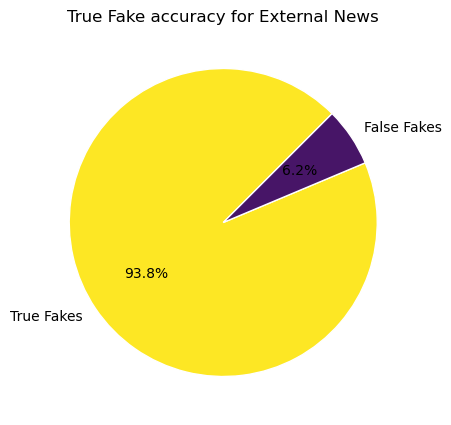

In [44]:
label_names = "True Fakes", "False Fakes"
plt.figure(figsize=(5,5))
plt.pie(test_fake_counts, labels=label_names, wedgeprops = {"linewidth":1, "edgecolor":"white"}, 
        autopct="%1.1f%%", startangle=45, colors=["#fde724", "#471567"])
plt.title("True Fake accuracy for External News")
plt.show()

In [45]:
# Now check true predictions by "Real News"

df_test_real = df_test[df_test["type_news"] == "Real"]

In [46]:
test_real_counts = df_test_real["class"].value_counts()

In [47]:
test_real_counts

class
True     939
False     72
Name: count, dtype: int64

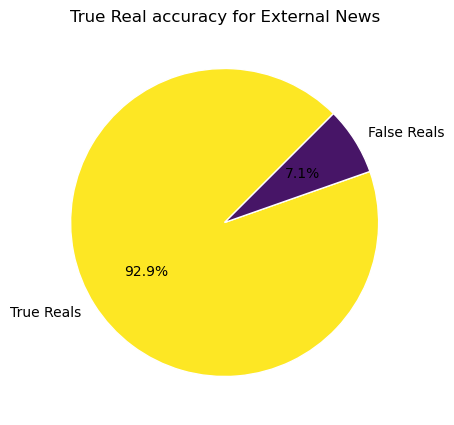

In [53]:
label_names2 = "True Reals", "False Reals"

plt.figure(figsize=(5,5))
plt.pie(test_real_counts, labels=label_names2, wedgeprops = {"linewidth":1, "edgecolor":"white"}, 
        autopct="%1.1f%%", startangle=45, colors=["#fde724", "#471567"])
plt.title("True Real accuracy for External News")
plt.show()

- After checking real cases of predictions. We obtain an acceptable high percentage of hits to trust our model.

In [56]:
# Export csv to use on streamlit

test_to_streamlit = df_test[["class", "text", "type_news"]]

In [57]:
test_to_streamlit.to_csv("test_to_streamlit.csv")

<h1 style="color: #492c68;">03 | SAVING THE MODEL</h1>

In [50]:
with open("model_NB.pkl", "wb") as file:
    pickle.dump(model_NB, file)

In [51]:
vectorizer = CountVectorizer()
vectorizer.fit_transform(X_train)

<1497x9685 sparse matrix of type '<class 'numpy.int64'>'
	with 24321 stored elements in Compressed Sparse Row format>

In [52]:
with open("vectorizer.pkl", "wb") as file:
    pickle.dump(vectorizer, file)